# Benchmarking `gpujpeg` 📊

In [ ]:
%run benchmark_gpujpeg_LoLa.py

# 📈 Data Visualization & Analysis

Now we will plot the collected data to understand the results. We will focus on:
1.  **Rate-Distortion:** How do quality metrics (like VMAF) change with file size?
2.  **Quality vs. File Size:** How does the `-quality` setting impact file size for different subsampling methods?
3.  **Encoding Performance:** Which Format method is fastest? How does resolution affect encoding time?
4.  **Decoding Performance:** How does resolution affect decoding time?

In [18]:
# --- Main Configuration ---
# Resolutions to test (Name: (Width, Height))
RESOLUTIONS = {
    '1280x720': (1280, 720),
    '1920x1080': (1920, 1080),
    '3840x2160': (3840, 2160),
}

# Parameters to benchmark
QUALITIES = range(40, 96, 1)
FORMATS = ['interleaved']
SUBSAMPLINGS = ['4:2:0']

SUBSAMPLING_TO_PARAM = {
    '4:2:0': '420'
}

In [19]:
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('results_gpujpeg_LoLa.csv')
df.head()

,Resolution,Quality,Format,Restart Interval,Subsampling,Iterations,Avg Encode Time (s),Encoder Setup Time (s),Encoder Cleanup Time (s),Avg Decode Time (s),Decoder Setup Time (s),Decoder Cleanup Time (s),Compressed Size (KB),PSNR,SSIM,Encode CMD,Decode CMD,Frame
0,1280x720,40,interleaved,8,4:2:0,100,0.000456,0.198407,0.001137,0.000418,0.124319,0.000869,30.490,41.813770,0.958803,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...,1
1,1280x720,41,interleaved,8,4:2:0,100,0.000431,0.116106,0.000584,0.000419,0.115927,0.000854,30.767,41.917995,0.958288,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...,1
2,1280x720,42,interleaved,8,4:2:0,100,0.000431,0.126549,0.001100,0.000414,0.123871,0.000867,30.954,41.774227,0.958155,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...,1
3,1280x720,43,interleaved,8,4:2:0,100,0.000437,0.116701,0.001071,0.000417,0.115428,0.000854,31.024,41.787632,0.958230,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...,1
4,1280x720,44,interleaved,8,4:2:0,100,0.000436,0.125267,0.001097,0.000414,0.117615,0.000860,31.289,42.038006,0.959574,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...,1


In [21]:
# Set plot style
sns.set_theme(style="whitegrid")

## Encoding Parameters vs. quality metrics

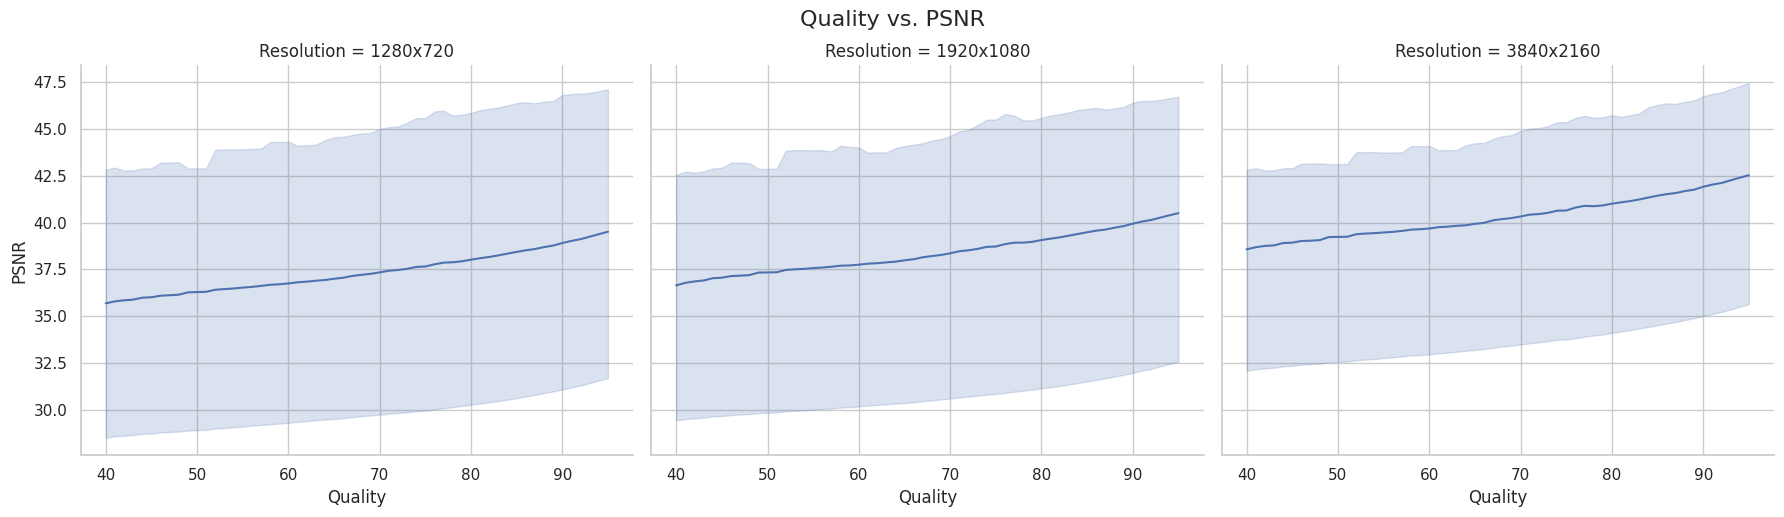

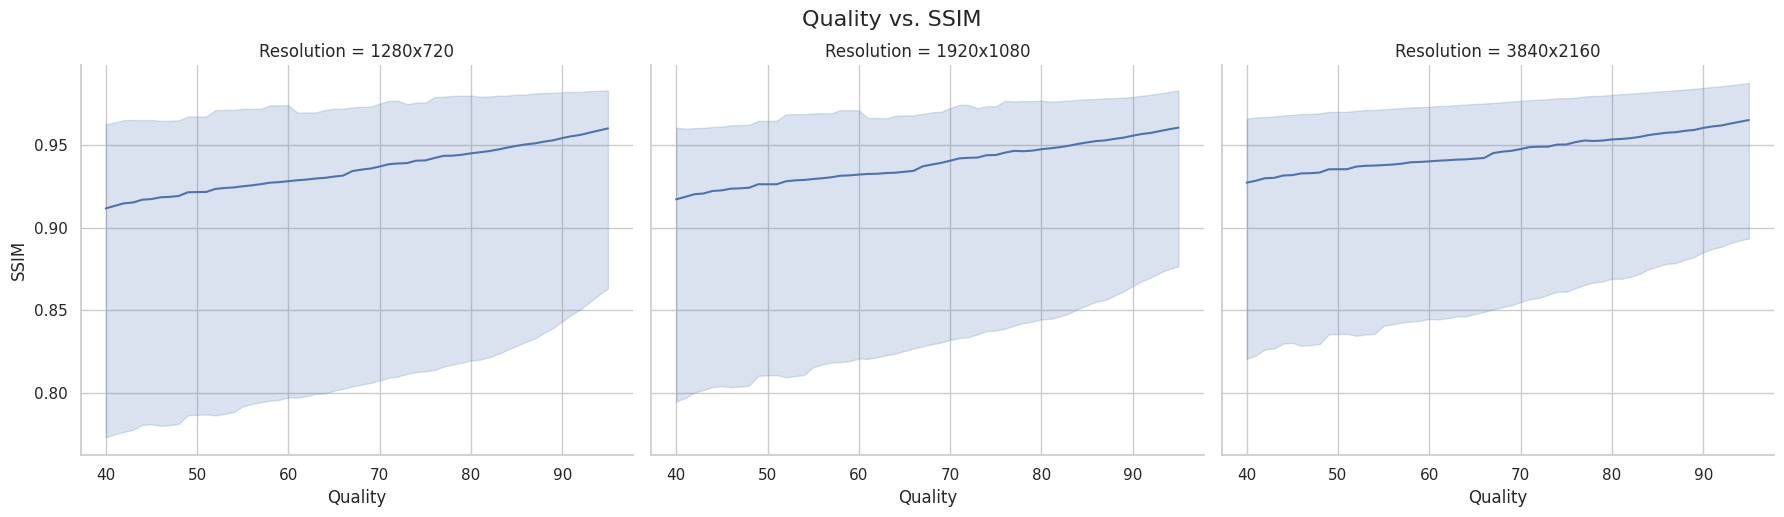

In [22]:
x = 'Quality'
y = 'PSNR'

g = sns.relplot(
    data=df,
    x=x,
    y=y,
    #hue='Frame',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharex': False},
    errorbar=("pi", 100)
)

g.figure.suptitle(f'{x} vs. {y}', y=1.03, fontsize=16)
g.set_axis_labels(x, y)
plt.show()

x = 'Quality'
y = 'SSIM'

g = sns.relplot(
    data=df,
    x=x,
    y=y,
    #hue='Frame',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharex': False},
    errorbar=("pi", 100)
)

g.figure.suptitle(f'{x} vs. {y}', y=1.03, fontsize=16)
g.set_axis_labels(x, y)
plt.show()

## Encoding Parameters vs. File Size


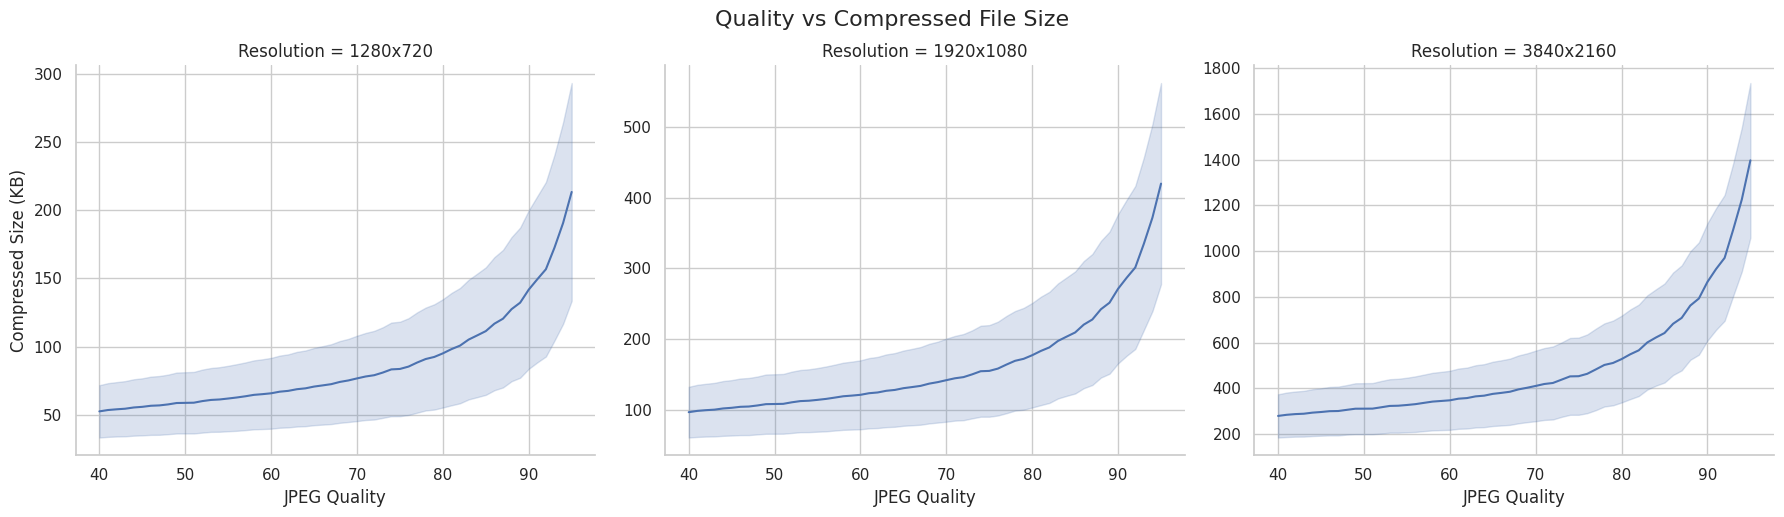

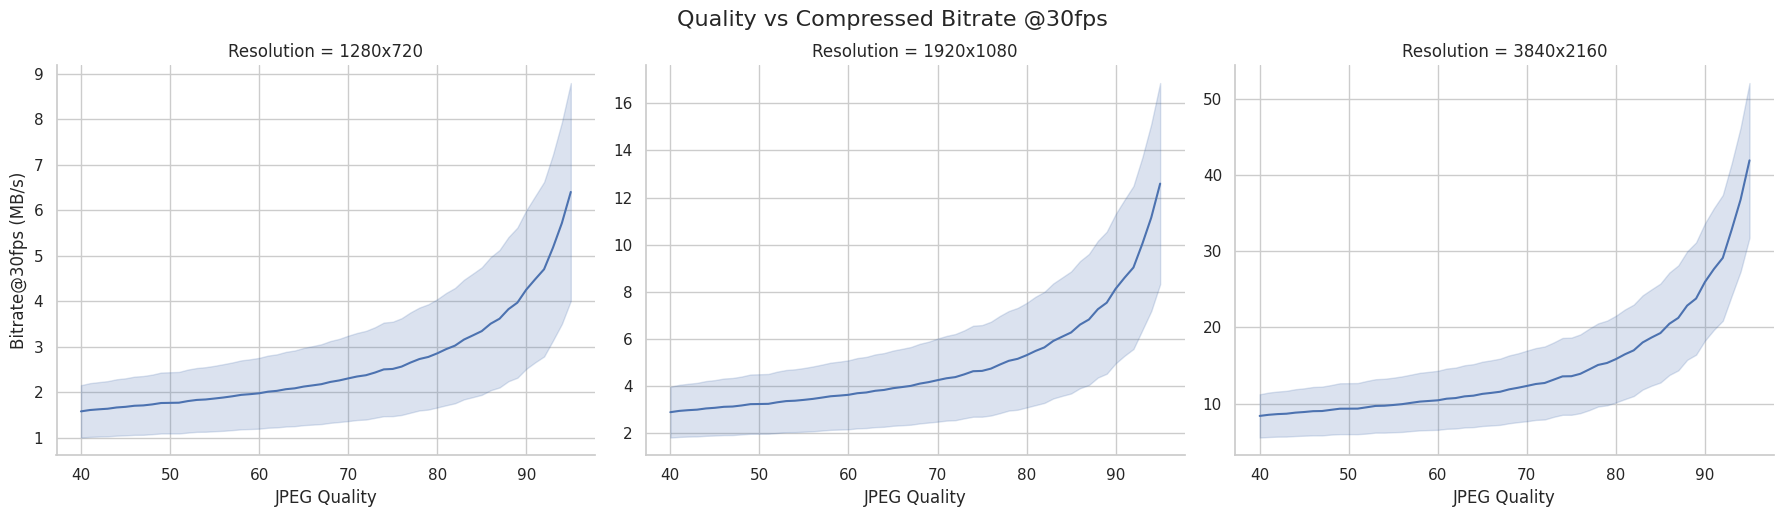

In [35]:
g = sns.relplot(
    data=df,
    x='Quality',
    y='Compressed Size (KB)',
    #hue='Frame',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharey': False},
    errorbar=("pi", 100)

)
g.figure.suptitle('Quality vs Compressed File Size', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', 'Compressed Size (KB)')
plt.show()

fps = 30
g = sns.relplot(
    data=df,
    x='Quality',
    y=df['Compressed Size (KB)'] * fps / 1000,
    #hue='Frame',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharey': False},
    errorbar=("pi", 100)
)
g.figure.suptitle(f'Quality vs Compressed Bitrate @{fps}fps', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', f'Bitrate@{fps}fps (MB/s)')
plt.show()

We can observe an explosion in file size from quality 95 onwards, and a sharp increase from quality 90 onwards.

## Encoding Parameters vs. Performance

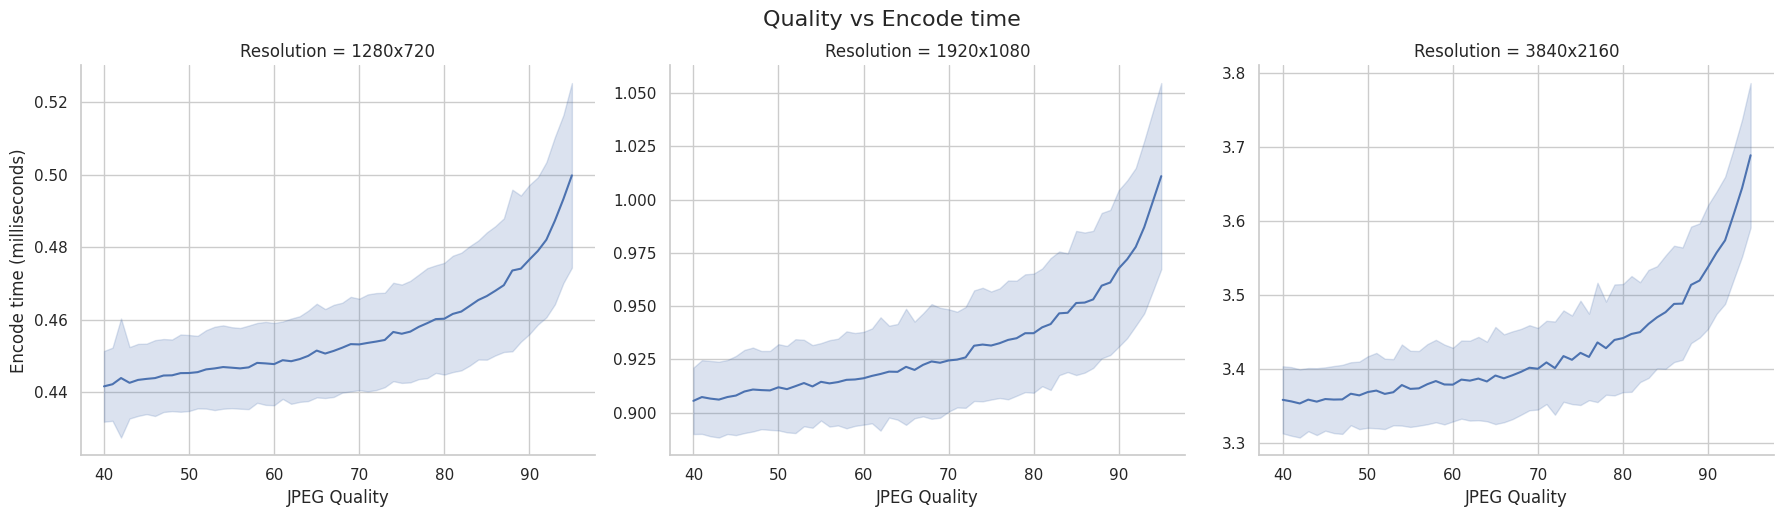

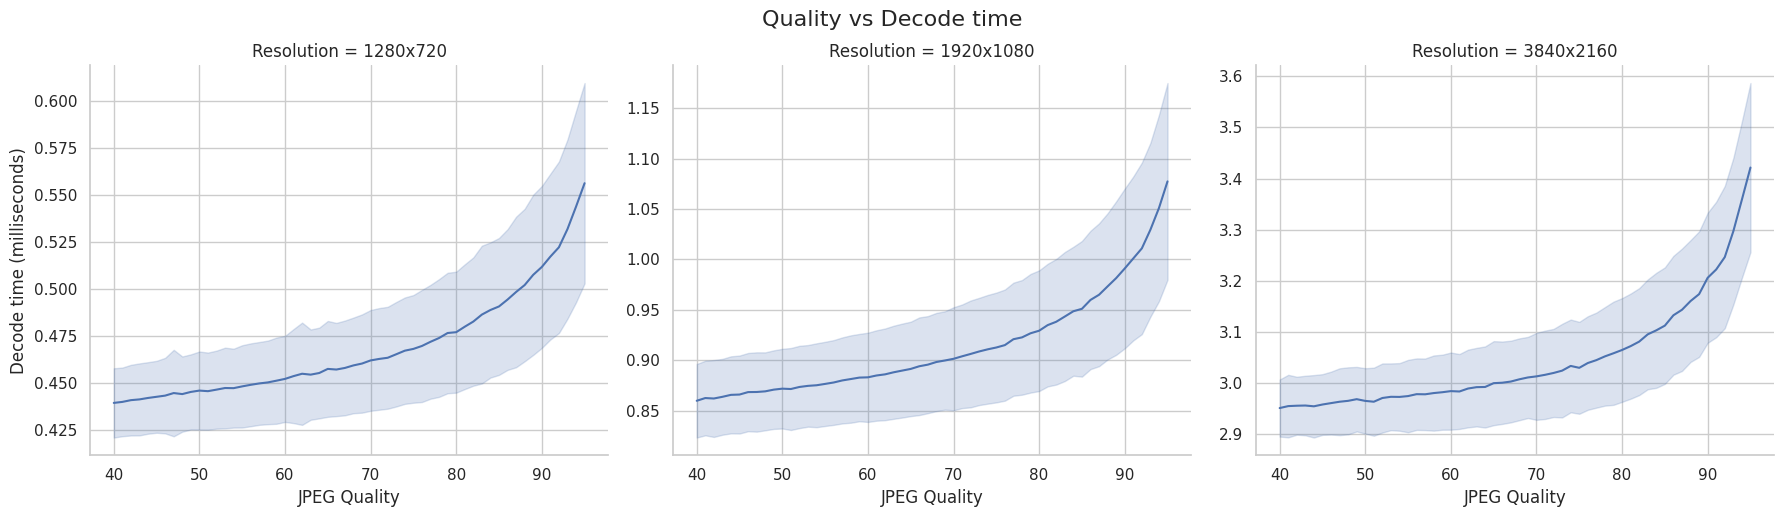

In [34]:
g = sns.relplot(
    data=df,
    x='Quality',
    y=df['Avg Encode Time (s)'] * 1000,
    #hue='Frame',
    kind='line',
    col='Resolution',
    col_order=RESOLUTIONS.keys(),
    height=5,
    aspect=1.2,
    facet_kws={'sharey': False},
    errorbar=("pi", 100)
)
g.figure.suptitle('Quality vs Encode time', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', 'Encode time (milliseconds)')
plt.show()

g = sns.relplot(
    data=df,
    x='Quality',
    y=df['Avg Decode Time (s)'] * 1000,
    #hue='Frame',
    kind='line',
    col='Resolution',
    col_order=RESOLUTIONS.keys(),
    height=5,
    aspect=1.2,
    facet_kws={'sharey': False},
    errorbar=("pi", 100)
)
g.figure.suptitle('Quality vs Decode time', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', 'Decode time (milliseconds)')
plt.show()

### Perform average avross frames

In [25]:
df_agg = df.groupby(['Quality', 'Resolution']).agg({
    #'Quality': 'first',  # kept as-is (assuming same value across group)
    'Avg Encode Time (s)': 'mean',    # averaged
    'Avg Decode Time (s)': 'mean',
    'Compressed Size (KB)': 'mean',
    'PSNR': 'mean',
    'SSIM': 'mean',
}).reset_index()

In [26]:
df_ultrahd = df_agg[df_agg['Resolution'] == '3840x2160']
df_fullhd = df_agg[df_agg['Resolution'] == '1920x1080']
df_hd = df_agg[df_agg['Resolution'] == '1280x720']

### UltraHD

In [27]:
df_ultrahd[df_ultrahd['Avg Encode Time (s)'] * 1000 + df_ultrahd['Avg Decode Time (s)'] * 1000 <= 2 * 2].sort_values(by='SSIM', ascending=False).head(5)

,Quality,Resolution,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM


### FullHD

In [28]:
df_fullhd[df_fullhd['Avg Encode Time (s)'] * 1000 + df_fullhd['Avg Decode Time (s)'] * 1000 <= 1.5 * 2].sort_values(by='SSIM', ascending=False).head(5)

,Quality,Resolution,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM
166,95,1920x1080,0.001011,0.001078,419.77751,40.507230,0.960550
163,94,1920x1080,0.000999,0.001051,371.70551,40.392008,0.959581
160,93,1920x1080,0.000987,0.001030,334.65304,40.267911,0.958523
157,92,1920x1080,0.000978,0.001011,301.10895,40.141880,0.957366
154,91,1920x1080,0.000972,0.001001,286.61823,40.058401,0.956708


In [29]:
df_fullhd[df_fullhd['Avg Encode Time (s)'] * 1000 + df_fullhd['Avg Decode Time (s)'] * 1000 <= 1 * 2].sort_values(by='SSIM', ascending=False).head(5)

,Quality,Resolution,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM
157,92,1920x1080,0.000978,0.001011,301.10895,40.141880,0.957366
154,91,1920x1080,0.000972,0.001001,286.61823,40.058401,0.956708
151,90,1920x1080,0.000968,0.000991,271.05088,39.944031,0.955678
148,89,1920x1080,0.000961,0.000981,251.32348,39.815252,0.954493
145,88,1920x1080,0.000960,0.000973,242.06112,39.730312,0.953761


In [30]:
df_fullhd[df_fullhd['Avg Encode Time (s)'] * 1000 + df_fullhd['Avg Decode Time (s)'] * 1000 <= 0.89 * 2].sort_values(by='SSIM', ascending=False).head(5)

,Quality,Resolution,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM
25,48,1920x1080,0.000911,0.000869,105.95079,37.194862,0.924203
22,47,1920x1080,0.000911,0.000868,104.46603,37.169543,0.923786
19,46,1920x1080,0.000910,0.000868,104.04330,37.144495,0.923601
16,45,1920x1080,0.000908,0.000866,102.64573,37.059388,0.922567
13,44,1920x1080,0.000907,0.000866,101.73366,37.030295,0.922222


### HD

In [31]:
df_hd[df_hd['Avg Encode Time (s)'] * 1000 + df_hd['Avg Decode Time (s)'] * 1000 <= 1 * 2].sort_values(by='SSIM', ascending=False).head(5)

,Quality,Resolution,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM
165,95,1280x720,0.000500,0.000556,213.33958,39.513310,0.960067
162,94,1280x720,0.000493,0.000544,190.55096,39.383973,0.958817
159,93,1280x720,0.000487,0.000532,172.55273,39.249706,0.957531
156,92,1280x720,0.000482,0.000522,156.70694,39.119894,0.956188
153,91,1280x720,0.000479,0.000517,149.35713,39.023801,0.955348


In [32]:
df_hd[df_hd['Avg Encode Time (s)'] * 1000 + df_hd['Avg Decode Time (s)'] * 1000 <= 0.5 * 2].sort_values(by='SSIM', ascending=False).head(5)


,Quality,Resolution,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM
153,91,1280x720,0.000479,0.000517,149.35713,39.023801,0.955348
150,90,1280x720,0.000477,0.000512,141.76116,38.911824,0.954237
147,89,1280x720,0.000474,0.000507,132.20821,38.776030,0.952865
144,88,1280x720,0.000474,0.000502,127.45295,38.692779,0.952070
141,87,1280x720,0.000470,0.000498,120.45706,38.591332,0.951039


In [33]:
df_hd[df_hd['Avg Encode Time (s)'] * 1000 + df_hd['Avg Decode Time (s)'] * 1000 <= 0.445 * 2].sort_values(by='SSIM', ascending=False).head(5)


,Quality,Resolution,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM
24,48,1280x720,0.000445,0.000444,57.66005,36.150510,0.919178
21,47,1280x720,0.000445,0.000444,56.93095,36.121595,0.918649
18,46,1280x720,0.000444,0.000443,56.66468,36.094554,0.918378
15,45,1280x720,0.000444,0.000442,55.87891,36.013985,0.917296
12,44,1280x720,0.000443,0.000442,55.40780,35.990368,0.916919
